In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State the hypothesis

Ho: unable to distinguish which was poured first 

Ha: able to tell if tea or milk was poured first

Step 2: Test Statistic (% of correctly discriminated cups)

6/8 = .75

Step 3: P-value

M = total number in bucket = 8

n = # to pick which think tea is first = 4

N = # in bucket with tea first = 4

p-value = 1-P(X<=2)

In [2]:
M,n,N = 8, 4, 4
1-stats.hypergeom.cdf(2,M,n,N)

0.24285714285714288

Step 4: because the p-value is 0.243, we fail to rejct the null hypothesis. There is not enough evidence to tell if the lady could distinguish if tea or milk was poured first.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [4]:
iris=Table().read_table("data/data/iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: state hypotheses

Ho: virginica and versicolor have equal mean sepal widths

Ha: some difference in mean sepal widths

Step 2: Test Statisitc

Difference in sample mean= 2.974-2.77=0.204

Step 3: p-value

If Ho were true, test stat would be 0

In [6]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [9]:
num_obs = iris_sub.num_rows
num_obs

100

In [10]:
ts = []
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column("sampled", iris_sub.sample(num_obs, with_replacement = False).column(1))
    ts = np.append(ts, np.diff(iris_sample.group(0, np.mean).column(2))[0])
ts

array([-0.012,  0.052, -0.024, ...,  0.064, -0.1  ,  0.04 ])

In [11]:
np.mean(ts>=0.204)

0.0006

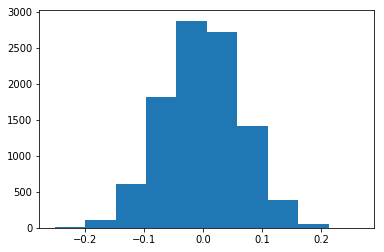

In [12]:
plt.hist(ts)
plt.show()

Step 4: reject the null hypothesis. This means that there is a difference in the mean sepal width for the virginica and versicolor.